In [6]:
from tree_detection_framework.detection.region_detections import RegionDetections, RegionDetectionsSet
from tree_detection_framework.postprocessing.postprocessing import multi_region_NMS

import numpy as np
import shapely

Set the constants

In [7]:
CRS = 26910 # Arbitrary CRS
N_TILES = 20
N_DETECTIONS_PER_TILE = 5

AREA_SIZE = 500
TILE_SIZE = 100
DETECTION_SIZE = 20

Create the detections

In [8]:
rd_list = []
# Create each detection individually
for i in range(N_TILES):
    # Randomly choose top left corner
    tile_tl = np.random.random((1, 2)) * (AREA_SIZE - TILE_SIZE)
    # Add the size to get the bottom right corner
    tile_br = tile_tl + TILE_SIZE
    tile = np.concatenate((tile_tl, tile_br), axis=1)
    # The offset is the top left corner repeated, for shifting from local to global
    offset = np.tile(tile_tl, (1,2))

    # Create detections within the size of the region
    detections_tl = np.random.random((N_DETECTIONS_PER_TILE, 2)) * (TILE_SIZE - DETECTION_SIZE)
    detections_br = detections_tl + DETECTION_SIZE

    # Concatente and shift to global coordinates
    detections_local = np.concatenate((detections_tl, detections_br), axis=1 )
    detections_absolute = detections_local + offset

    # Create shapely objects from the tile bounds and the detections
    tile_box = shapely.box(tile[0, 0], tile[0, 1], tile[0, 2], tile[0, 3])
    detection_boxes = shapely.box(
        detections_absolute[:, 0],
        detections_absolute[:, 1],
        detections_absolute[:, 2],
        detections_absolute[:, 3]
    )

    # Create random scores for each detection
    data = {"score": np.random.random(N_DETECTIONS_PER_TILE)}

    # Create the region detection object
    rd = RegionDetections(
        detection_geometries=detection_boxes,
        data=data,
        CRS=CRS,
        input_in_pixels=False,
        geospatial_prediction_bounds=tile_box
    )
    rd_list.append(rd)

# Create a RegionDetectionSet object
rds = RegionDetectionsSet(rd_list)

Plot the detection set

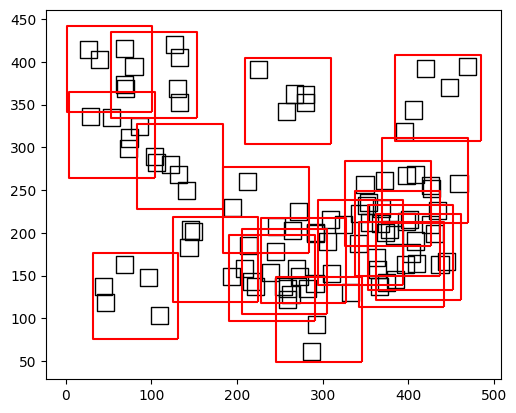

<Axes: >

In [9]:
rds.plot(bounds_color="r")

Run nonmax suppression and plot again. This time the bounds will be merged because it is now one region.

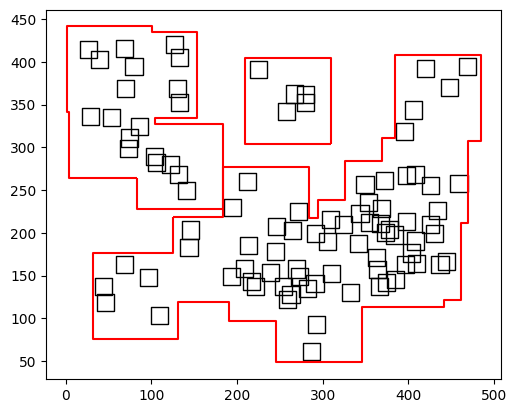

<Axes: >

In [10]:
NMS_suppressed_rds = multi_region_NMS(rds)
NMS_suppressed_rds.plot(bounds_color="r")